In [99]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#import packages for w2v
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# RBF SVC

In Radial Basis Function(RBF) SVC, the hyperparameters are going to be C and gamma. 
(gamma=1/sigma)

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import *
from sklearn.svm import SVC
#from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

def grid_search(X_train, y_train): 

    gamma = [10**-4, 10**-2, 10**0, 10**2, 10**4]
    #penalty = ['l1', 'l2']
    C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
    
    hyperparameters = dict(C=C, gamma=gamma)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)
    #RBF as kernel
    clf=SVC(kernel='rbf')
    
    #Using GridSearchCV
    model = GridSearchCV(clf, hyperparameters, scoring = 'f1', cv=5, n_jobs=5)
    model.fit(X_train, y_train)
    
    opt_val=model.best_estimator_.get_params()['C']
    #best_penalty=model.best_estimator_.get_params()['penalty']
    best_gamma=model.best_estimator_.get_params()['gamma']
    #o=model.get_params().keys()
    #return o
    return opt_val,best_gamma

In [101]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
import random

def random_search(X_train, y_train):
    
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

    # Create regularization hyperparameter distribution using uniform distribution
    C = uniform(loc=0, scale=1)
    gamma = uniform(loc=0, scale=1)
    
    #RBF as kernel
    clf1=SVC(kernel='rbf')
    
    # Create hyperparameter options
    hyperparameters = dict(C=C, gamma=gamma)
    model1 = RandomizedSearchCV(clf1, hyperparameters, random_state=1, n_iter=1, cv=5, verbose=0, n_jobs=-1)
    best_model = model1.fit(X_train, y_train)
    # View best hyperparameters
    print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
    print('Best C:', best_model.best_estimator_.get_params()['C'])
    # Predict target vector
    opt_val=best_model.best_estimator_.get_params()['C']
    best_gamma=best_model.best_estimator_.get_params()['gamma']
    
    return opt_val,best_gamma

For SGD classifier our hyperparameters will be alpha and penalty

In [102]:
def sgd_clf(X_train, y_train):
    
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

    # Create regularization hyperparameter distribution using uniform distribution
    alpha = [10**-3, 10**-2, 10**-1, 10**0,10**1, 10**2, 10**3, 10**4]
    penalty =['l1','l2']
    
    clf2 = SGDClassifier(loss='hinge')
    
    # Create hyperparameter options
    hyperparameters = dict(alpha=alpha, penalty=penalty)
    model2 = GridSearchCV(clf2, hyperparameters, scoring = 'f1',  cv=5, n_jobs=5)
    best_model = model2.fit(X_train, y_train)
    # View best hyperparameters
    print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])
    print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
    # Predict target vector
    opt_alpha=best_model.best_estimator_.get_params()['alpha']
    best_penalty=best_model.best_estimator_.get_params()['penalty']
    
    return opt_alpha,best_penalty


In [103]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
def confusion_matrix_plot(y_test,pred):
    labels = [0,1]
    y_t=y_test
    pred_c=pred
    cm = confusion_matrix(y_t, pred_c, labels)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    #fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [104]:
from sklearn import cross_validation

optimal_C,optimal_gamma = grid_optimal_C(bow_train[0],bow_train[1])
print(optimal_C)
print(optimal_gamma)

#print(optimal_alpha)

10000
0.0001


# BoW

In [105]:
import pickle
f1 = 'bow_train_data.sav'

f2 = 'test_data.sav'

bow_train = pickle.load(open(f1, 'rb'))
bow_test = pickle.load(open(f2, 'rb'))

In [106]:
#GRID SEARCH
from sklearn.metrics import accuracy_score

optimal_C,optimal_gamma = grid_optimal_C(bow_train[0],bow_train[1])
svc = SVC(C=optimal_C,gamma=optimal_gamma)
svc.fit(bow_train[0],bow_train[1])
pred = svc.predict(bow_test[0])
# y_test = count_vect.fit_transform(y_test)
acc = accuracy_score(bow_test[1], pred) * 100
train_error=svc.score(bow_train[0],bow_train[1])
test_error=svc.score(bow_test[0],bow_test[1])
print('\nThe accuracy of the SVC for C = %f%% and gamma = %f%% is %f%%' % (optimal_C,optimal_gamma, acc))


The accuracy of the SVC for C = 0.000100% and gamma = 0.000100% is 83.000000%


[[  0  51]
 [  0 249]]


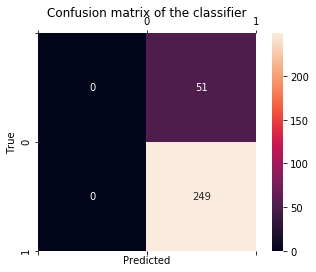

In [107]:
confusion_matrix_plot(bow_test[1],pred)

In [108]:
#Printing Classification Report
from sklearn.metrics import classification_report

print(classification_report(bow_test[1],pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.83      1.00      0.91       249

avg / total       0.69      0.83      0.75       300



In [109]:
#RANDOM SEARCH
from sklearn.metrics import accuracy_score

optimal_C,optimal_gamma = random_search(bow_train[0],bow_train[1])
svc = SVC(C=optimal_C,gamma=optimal_gamma)
svc.fit(bow_train[0],bow_train[1])
pred = svc.predict(bow_test[0])
# y_test = count_vect.fit_transform(y_test)
acc = accuracy_score(bow_test[1], pred) * 100
train_error=svc.score(bow_train[0],bow_train[1])
test_error=svc.score(bow_test[0],bow_test[1])
print('\nThe accuracy of the SVC for C = %f%% and gamma = %f%% is %f%%' % (optimal_C,optimal_gamma, acc))

Best gamma: 0.7203244934421581
Best C: 0.417022004702574

The accuracy of the SVC for C = 0.417022% and gamma = 0.720324% is 83.000000%


[[  0  51]
 [  0 249]]


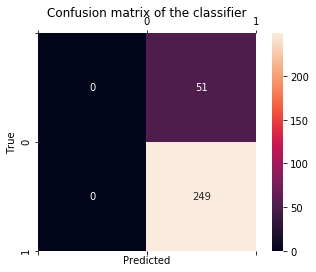

In [110]:
confusion_matrix_plot(bow_test[1],pred)

In [111]:
#Printing Classification Report
from sklearn.metrics import classification_report

print(classification_report(bow_test[1],pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.83      1.00      0.91       249

avg / total       0.69      0.83      0.75       300



In [119]:
#SGD Classf.
from sklearn.metrics import accuracy_score

opt_alpha,best_penalty = sgd_clf(bow_train[0],bow_train[1])
sgd = SGDClassifier(alpha=opt_alpha,penalty=best_penalty)
sgd.fit(bow_train[0],bow_train[1])
pred = sgd.predict(bow_test[0])
acc = accuracy_score(bow_test[1], pred) * 100
train_error=sgd.score(bow_train[0],bow_train[1])
test_error=sgd.score(bow_test[0],bow_test[1])
print('\nThe accuracy of the SGD Classifier for alpha = %f%% and best_penalty = %s is %f%%' % (opt_alpha,best_penalty, acc))

Best alpha: 0.01
Best penalty: l2

The accuracy of the SGD Classifier for alpha = 0.010000% and best_penalty = l2 is 87.333333%


[[ 13  38]
 [  1 248]]


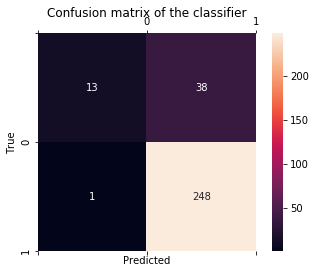

In [113]:
confusion_matrix_plot(bow_test[1],pred)

In [114]:
#Printing Classification Report
from sklearn.metrics import classification_report

print(classification_report(bow_test[1],pred))

             precision    recall  f1-score   support

          0       0.93      0.25      0.40        51
          1       0.87      1.00      0.93       249

avg / total       0.88      0.87      0.84       300



In [115]:
#Printing final results
from astropy.table import Table, Column
t = Table(names=( "Hyper parameter", "Train error","Test error"), dtype=('i4', 'f4', 'f4'))
t.add_row((optimal_alpha, train_error, test_error))
print(t)

NameError: name 'optimal_alpha' is not defined

# TF-IDF

In [121]:
f3 = 'tfidf_train_data.sav'

f4 = 'tfidf_data.sav'

tfidf_train = pickle.load(open(f3, 'rb'))
tfidf_test = pickle.load(open(f4, 'rb'))

In [122]:
#GRID SEARCH
from sklearn.metrics import accuracy_score

optimal_C,optimal_gamma = grid_optimal_C(tfidf_train[0],tfidf_train[1])
svc = SVC(C=optimal_C,gamma=optimal_gamma)
svc.fit(tfidf_train[0],tfidf_train[1])
pred = svc.predict(tfidf_test[0])
# y_test = count_vect.fit_transform(y_test)
acc = accuracy_score(tfidf_test[1], pred) * 100
train_error=svc.score(tfidf_train[0],tfidf_train[1])
test_error=svc.score(tfidf_test[0],tfidf_test[1])
print('\nThe accuracy of the SVC for C = %f%% and gamma = %f%% is %f%%' % (optimal_C,optimal_gamma, acc))


The accuracy of the SVC for C = 100.000000% and gamma = 0.010000% is 87.666667%


[[ 14  37]
 [  0 249]]


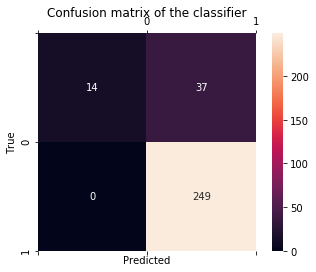

In [123]:
confusion_matrix_plot(tfidf_test[1],pred)

In [124]:
print(classification_report(tfidf_test[1],pred))

             precision    recall  f1-score   support

          0       1.00      0.27      0.43        51
          1       0.87      1.00      0.93       249

avg / total       0.89      0.88      0.85       300



In [125]:
#RANDOM SEARCH
from sklearn.metrics import accuracy_score

optimal_C,optimal_gamma = random_search(tfidf_train[0],tfidf_train[1])
svc = SVC(C=optimal_C,gamma=optimal_gamma)
svc.fit(tfidf_train[0],tfidf_train[1])
pred = svc.predict(tfidf_test[0])
# y_test = count_vect.fit_transform(y_test)
acc = accuracy_score(tfidf_test[1], pred) * 100
train_error=svc.score(tfidf_train[0],tfidf_train[1])
test_error=svc.score(tfidf_test[0],tfidf_test[1])
print('\nThe accuracy of the SVC for C = %f%% and gamma = %f%% is %f%%' % (optimal_C,optimal_gamma, acc))

Best gamma: 0.7203244934421581
Best C: 0.417022004702574

The accuracy of the SVC for C = 0.417022% and gamma = 0.720324% is 83.000000%


[[  0  51]
 [  0 249]]


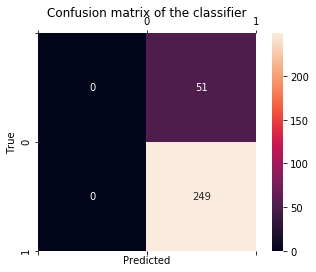

In [126]:
confusion_matrix_plot(tfidf_test[1],pred)

In [127]:
print(classification_report(tfidf_test[1],pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.83      1.00      0.91       249

avg / total       0.69      0.83      0.75       300



In [128]:
#SGD Classf.
from sklearn.metrics import accuracy_score

opt_alpha,best_penalty = sgd_clf(tfidf_train[0],tfidf_train[1])
sgd = SGDClassifier(alpha=opt_alpha,penalty=best_penalty)
sgd.fit(tfidf_train[0],tfidf_train[1])
pred = sgd.predict(tfidf_test[0])
acc = accuracy_score(tfidf_test[1], pred) * 100
train_error=sgd.score(tfidf_train[0],tfidf_train[1])
test_error=sgd.score(tfidf_test[0],tfidf_test[1])
print('\nThe accuracy of the SGD Classifier for alpha = %f%% and best_penalty = %s is %f%%' % (opt_alpha,best_penalty, acc))

Best alpha: 0.001
Best penalty: l1

The accuracy of the SGD Classifier for alpha = 0.001000% and best_penalty = l1 is 83.000000%


[[  0  51]
 [  0 249]]


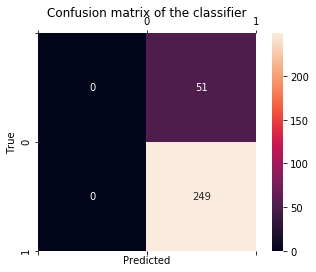

In [129]:
confusion_matrix_plot(tfidf_test[1],pred)

In [130]:
print(classification_report(tfidf_test[1],pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.83      1.00      0.91       249

avg / total       0.69      0.83      0.75       300



# Avg W2V

In [131]:
f5 = 'avg_w2v_train_data.sav'
f6 = 'avg_w2v_test_data.sav'
avg_w2v_train = pickle.load(open(f5, 'rb'))
avg_w2v_test = pickle.load(open(f6, 'rb'))

In [132]:
#GRID SEARCH
from sklearn.metrics import accuracy_score

optimal_C,optimal_gamma = grid_optimal_C(avg_w2v_train[0],avg_w2v_train[1])
svc = SVC(C=optimal_C,gamma=optimal_gamma)
svc.fit(avg_w2v_train[0],avg_w2v_train[1])
pred = svc.predict(avg_w2v_test[0])
# y_test = count_vect.fit_transform(y_test)
acc = accuracy_score(avg_w2v_test[1], pred) * 100
train_error=svc.score(avg_w2v_train[0],avg_w2v_train[1])
test_error=svc.score(avg_w2v_test[0],avg_w2v_test[1])
print('\nThe accuracy of the SVC for C = %f%% and gamma = %f%% is %f%%' % (optimal_C,optimal_gamma, acc))


The accuracy of the SVC for C = 0.000100% and gamma = 0.000100% is 83.000000%


[[  0  51]
 [  0 249]]


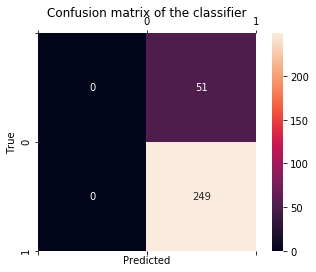

In [133]:
confusion_matrix_plot(avg_w2v_test[1],pred)

In [134]:
print(classification_report(avg_w2v_test[1],pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.83      1.00      0.91       249

avg / total       0.69      0.83      0.75       300



In [135]:
#GRID SEARCH
from sklearn.metrics import accuracy_score

optimal_C,optimal_gamma = random_search(avg_w2v_train[0],avg_w2v_train[1])
svc = SVC(C=optimal_C,gamma=optimal_gamma)
svc.fit(avg_w2v_train[0],avg_w2v_train[1])
pred = svc.predict(avg_w2v_test[0])
# y_test = count_vect.fit_transform(y_test)
acc = accuracy_score(avg_w2v_test[1], pred) * 100
train_error=svc.score(avg_w2v_train[0],avg_w2v_train[1])
test_error=svc.score(avg_w2v_test[0],avg_w2v_test[1])
print('\nThe accuracy of the SVC for C = %f%% and gamma = %f%% is %f%%' % (optimal_C,optimal_gamma, acc))

Best gamma: 0.7203244934421581
Best C: 0.417022004702574

The accuracy of the SVC for C = 0.417022% and gamma = 0.720324% is 83.000000%


[[  0  51]
 [  0 249]]


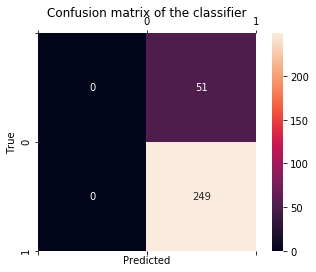

In [136]:
confusion_matrix_plot(avg_w2v_test[1],pred)

In [137]:
print(classification_report(avg_w2v_test[1],pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.83      1.00      0.91       249

avg / total       0.69      0.83      0.75       300



In [138]:
#SGD Classf.
from sklearn.metrics import accuracy_score

opt_alpha,best_penalty = sgd_clf(avg_w2v_train[0],avg_w2v_train[1])
sgd = SGDClassifier(alpha=opt_alpha,penalty=best_penalty)
sgd.fit(avg_w2v_train[0],avg_w2v_train[1])
pred = sgd.predict(avg_w2v_test[0])
acc = accuracy_score(avg_w2v_test[1], pred) * 100
train_error=sgd.score(avg_w2v_train[0],avg_w2v_train[1])
test_error=sgd.score(avg_w2v_test[0],avg_w2v_test[1])
print('\nThe accuracy of the SGD Classifier for alpha = %f%% and best_penalty = %s is %f%%' % (opt_alpha,best_penalty, acc))

Best alpha: 0.001
Best penalty: l1

The accuracy of the SGD Classifier for alpha = 0.001000% and best_penalty = l1 is 83.000000%


[[  0  51]
 [  0 249]]


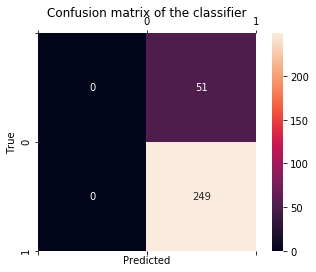

In [139]:
confusion_matrix_plot(avg_w2v_test[1],pred)

In [140]:
print(classification_report(avg_w2v_test[1],pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.83      1.00      0.91       249

avg / total       0.69      0.83      0.75       300



# TF-IDF W2V

In [141]:
f7 = 'tfidf_w2v_train_data.sav'
f8 = 'tfidf_w2v_test_data.sav'

tfidf_w2v_train = pickle.load(open(f7, 'rb'))
tfidf_w2v_test = pickle.load(open(f8, 'rb'))

In [143]:
#GRID SEARCH
from sklearn.metrics import accuracy_score

optimal_C,optimal_gamma = grid_optimal_C(tfidf_w2v_train[0],tfidf_w2v_train[1])
svc = SVC(C=optimal_C,gamma=optimal_gamma)
svc.fit(tfidf_w2v_train[0],tfidf_w2v_train[1])
pred = svc.predict(tfidf_w2v_test[0])
# y_test = count_vect.fit_transform(y_test)
acc = accuracy_score(tfidf_w2v_test[1], pred) * 100
train_error=svc.score(tfidf_w2v_train[0],tfidf_w2v_train[1])
test_error=svc.score(tfidf_w2v_test[0],tfidf_w2v_test[1])
print('\nThe accuracy of the SVC for C = %f%% and gamma = %f%% is %f%%' % (optimal_C,optimal_gamma, acc))


The accuracy of the SVC for C = 0.000100% and gamma = 0.000100% is 83.000000%


[[  0  51]
 [  0 249]]


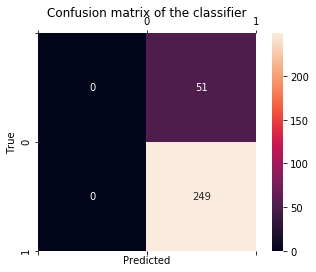

In [144]:
confusion_matrix_plot(tfidf_w2v_test[1],pred)

In [145]:
print(classification_report(tfidf_w2v_test[1],pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.83      1.00      0.91       249

avg / total       0.69      0.83      0.75       300



In [146]:
#RANDOM SEARCH
from sklearn.metrics import accuracy_score

optimal_C,optimal_gamma = random_search(tfidf_w2v_train[0],tfidf_w2v_train[1])
svc = SVC(C=optimal_C,gamma=optimal_gamma)
svc.fit(tfidf_w2v_train[0],tfidf_w2v_train[1])
pred = svc.predict(tfidf_w2v_test[0])
# y_test = count_vect.fit_transform(y_test)
acc = accuracy_score(tfidf_w2v_test[1], pred) * 100
train_error=svc.score(tfidf_w2v_train[0],tfidf_w2v_train[1])
test_error=svc.score(tfidf_w2v_test[0],tfidf_w2v_test[1])
print('\nThe accuracy of the SVC for C = %f%% and gamma = %f%% is %f%%' % (optimal_C,optimal_gamma, acc))

Best gamma: 0.7203244934421581
Best C: 0.417022004702574

The accuracy of the SVC for C = 0.417022% and gamma = 0.720324% is 83.000000%


[[  0  51]
 [  0 249]]


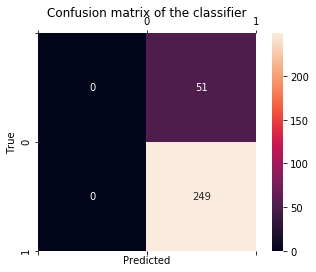

In [147]:
confusion_matrix_plot(tfidf_w2v_test[1],pred)

In [148]:
print(classification_report(tfidf_w2v_test[1],pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.83      1.00      0.91       249

avg / total       0.69      0.83      0.75       300



In [150]:
#SGD Classf.
from sklearn.metrics import accuracy_score

opt_alpha,best_penalty = sgd_clf(tfidf_w2v_train[0],tfidf_w2v_train[1])
sgd = SGDClassifier(alpha=opt_alpha,penalty=best_penalty)
sgd.fit(tfidf_w2v_train[0],tfidf_w2v_train[1])
pred = sgd.predict(tfidf_w2v_test[0])
acc = accuracy_score(tfidf_w2v_test[1], pred) * 100
train_error=sgd.score(tfidf_w2v_train[0],tfidf_w2v_train[1])
test_error=sgd.score(tfidf_w2v_test[0],tfidf_w2v_test[1])
print('\nThe accuracy of the SGD Classifier for alpha = %f%% and best_penalty = %s is %f%%' % (opt_alpha,best_penalty, acc))

Best alpha: 0.001
Best penalty: l1

The accuracy of the SGD Classifier for alpha = 0.001000% and best_penalty = l1 is 83.000000%


[[  0  51]
 [  0 249]]


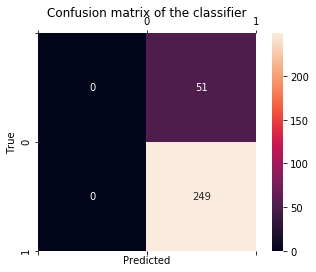

In [151]:
confusion_matrix_plot(tfidf_w2v_test[1],pred)

In [153]:
print(classification_report(tfidf_w2v_test[1],pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        51
          1       0.83      1.00      0.91       249

avg / total       0.69      0.83      0.75       300

